In [303]:
import pandas as pd
import numpy as np
import tensorflow as tf
from torch.autograd import Variable

In [304]:
df = pd.read_csv("data_daily.csv")
df.head()

,# Date,Receipt_Count
0,1/1/21,7564766
1,1/2/21,7455524
2,1/3/21,7095414
3,1/4/21,7666163
4,1/5/21,7771289


In [305]:
df.shape

(365, 2)

In [306]:
df.describe

<bound method NDFrame.describe of        # Date  Receipt_Count
0      1/1/21        7564766
1      1/2/21        7455524
2      1/3/21        7095414
3      1/4/21        7666163
4      1/5/21        7771289
..        ...            ...
360  12/27/21       10350408
361  12/28/21       10219445
362  12/29/21       10313337
363  12/30/21       10310644
364  12/31/21       10211187

[365 rows x 2 columns]>

In [307]:
from datetime import datetime
df['# Date'] = pd.to_datetime(df['# Date'])

In [308]:
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [309]:
df.dtypes

# Date           datetime64[ns]
Receipt_Count             int64
dtype: object

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

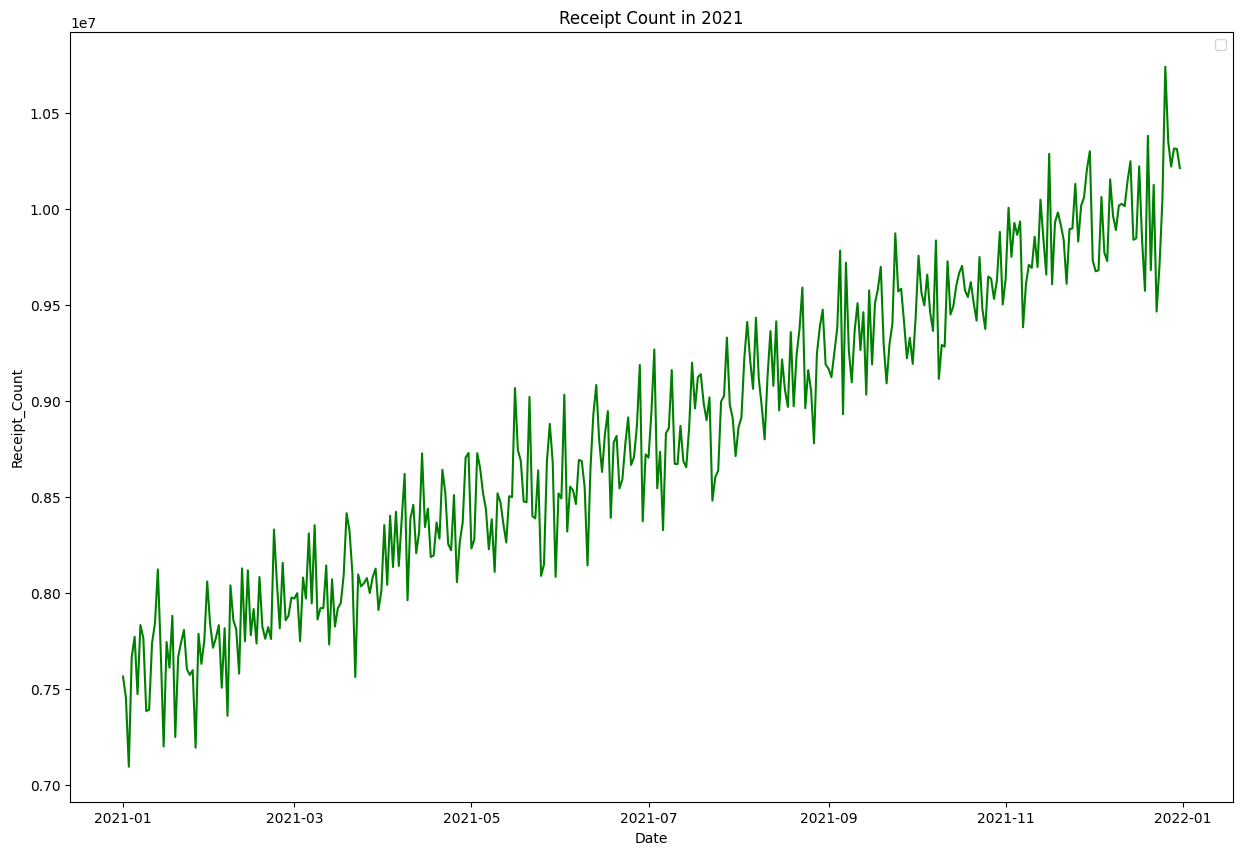

In [311]:
plt.figure(figsize=(15, 10))
plt.plot(df['# Date'], df['Receipt_Count'], color='green')
plt.xlabel('Date')
plt.ylabel('Receipt_Count')
plt.title('Receipt Count in 2021')
plt.legend()
plt.show()

In [312]:
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [313]:
month_dict = dict()
for month in range(1,13):
    month_dict[month] = 0

In [314]:
month_dict

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [315]:
df["Receipt_Count"].iloc[0]

7564766

In [316]:
iloc_val = 0
for date in df["# Date"]:
    month = date.month
    month_dict[month] += df["Receipt_Count"].iloc[iloc_val]

In [317]:
month_dict

{1: 234507746,
 2: 211813448,
 3: 234507746,
 4: 226942980,
 5: 234507746,
 6: 226942980,
 7: 234507746,
 8: 234507746,
 9: 226942980,
 10: 234507746,
 11: 226942980,
 12: 234507746}

In [318]:
month_list = [month for month in month_dict.keys()]
month_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [319]:
receipt_counter = [count for count in month_dict.values()]
receipt_counter

[234507746,
 211813448,
 234507746,
 226942980,
 234507746,
 226942980,
 234507746,
 234507746,
 226942980,
 234507746,
 226942980,
 234507746]

In [320]:
min_val = min(receipt_counter)
max_val = max(receipt_counter)

for idx, count in enumerate(receipt_counter):
    receipt_counter[idx] = (receipt_counter[idx] - min_val) / (max_val - min_val)

In [321]:
receipt_counter

[1.0,
 0.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 1.0]

In [322]:
new_df = pd.DataFrame(data = {"Date" : month_list, "Receipt_Count": receipt_counter})
new_df.head()

,Date,Receipt_Count
0,1,1.000000
1,2,0.000000
2,3,1.000000
3,4,0.666667
4,5,1.000000


In [323]:
from torch import nn
import torch

In [324]:
def reshape_conversion(data):
    numpyarray = np.array(data)
    numpyarray_dtype = numpyarray.astype(np.float32)
    numpyarray_reshape = numpyarray_dtype.reshape(-1, 1)
    tensor_array = torch.tensor(numpyarray_reshape)
    tensor_array = Variable(tensor_array)
    return tensor_array

In [325]:
month_data1 = reshape_conversion(month_list[0:11])
month_data2 = reshape_conversion(month_list[-1])

In [326]:
receipt_count_data1 = reshape_conversion(receipt_counter[0:11])
receipt_count_data2 = reshape_conversion(receipt_counter[-1])

In [327]:
receipt_count_data1

tensor([[1.0000],
        [0.0000],
        [1.0000],
        [0.6667],
        [1.0000],
        [0.6667],
        [1.0000],
        [1.0000],
        [0.6667],
        [1.0000],
        [0.6667]])

In [328]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def datamodel():
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 1)))
    model.add(Dropout(0.3))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model

In [329]:
model = datamodel()
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
early_stopping = EarlyStopping(monitor='train_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='train_loss', factor=0.2, patience=5, min_lr=1e-6)
month_data1 = tf.convert_to_tensor(month_data1, dtype=tf.float32)
receipt_count_data1 = tf.convert_to_tensor(receipt_count_data1, dtype=tf.float32)
model_checkpoint = ModelCheckpoint('bestmodel.h5',monitor='train_loss', save_best_only=True)
model_fit = model.fit(month_data1, receipt_count_data1, epochs=100, verbose=1, callbacks=[early_stopping, reduce_lr, model_checkpoint])
model_fit

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.6816

1/1 [==============================] - 3s 3s/step - loss: 0.6816 - lr: 0.0010
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6783

1/1 [==============================] - 0s 18ms/step - loss: 0.6783 - lr: 0.0010
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.6659

1/1 [==============================] - 0s 23ms/step - loss: 0.6659 - lr: 0.0010
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.6601

1/1 [==============================] - 0s 29ms/step - loss: 0.6601 - lr: 0.0010
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 0.6353

1/1 [==============================] - 0s 23ms/step - loss: 0.6353 - lr: 0.0010
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 0.6325

1/1 [==============================] - 0s 17ms/step - loss: 0.6325 - lr: 0.0010
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 0.6120

1/1 [==============================] - 0s 17ms/step - loss: 0.6120 - lr: 0.0010
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 0.5953

1/1 [==============================] - 0s 25ms/step - loss: 0.5953 - lr: 0.0010
Epoch 9/100
1/1 [==============================] - ETA: 0s - loss: 0.5804

1/1 [==============================] - 0s 19ms/step - loss: 0.5804 - lr: 0.0010
Epoch 10/100
1/1 [==============================] - ETA: 0s - loss: 0.5710

1/1 [==============================] - 0s 19ms/step - loss: 0.5710 - lr: 0.0010
Epoch 11/100
1/1 [==============================] - ETA: 0s - loss: 0.5665

1/1 [==============================] - 0s 20ms/step - loss: 0.5665 - lr: 0.0010
Epoch 12/100
1/1 [==============================] - ETA: 0s - loss: 0.5555

1/1 [==============================] - 0s 22ms/step - loss: 0.5555 - lr: 0.0010
Epoch 13/100
1/1 [==============================] - ETA: 0s - loss: 0.5238

1/1 [==============================] - 0s 16ms/step - loss: 0.5238 - lr: 0.0010
Epoch 14/100
1/1 [==============================] - ETA: 0s - loss: 0.5265

1/1 [==============================] - 0s 15ms/step - loss: 0.5265 - lr: 0.0010
Epoch 15/100
1/1 [==============================] - ETA: 0s - loss: 0.5163

1/1 [==============================] - 0s 15ms/step - loss: 0.5163 - lr: 0.0010
Epoch 16/100
1/1 [==============================] - ETA: 0s - loss: 0.4989

1/1 [==============================] - 0s 27ms/step - loss: 0.4989 - lr: 0.0010
Epoch 17/100
1/1 [==============================] - ETA: 0s - loss: 0.4925

1/1 [==============================] - 0s 18ms/step - loss: 0.4925 - lr: 0.0010
Epoch 18/100
1/1 [==============================] - ETA: 0s - loss: 0.4612

1/1 [==============================] - 0s 18ms/step - loss: 0.4612 - lr: 0.0010
Epoch 19/100
1/1 [==============================] - ETA: 0s - loss: 0.4401

1/1 [==============================] - 0s 19ms/step - loss: 0.4401 - lr: 0.0010
Epoch 20/100
1/1 [==============================] - ETA: 0s - loss: 0.4326

1/1 [==============================] - 0s 25ms/step - loss: 0.4326 - lr: 0.0010
Epoch 21/100
1/1 [==============================] - ETA: 0s - loss: 0.4223

1/1 [==============================] - 0s 23ms/step - loss: 0.4223 - lr: 0.0010
Epoch 22/100
1/1 [==============================] - ETA: 0s - loss: 0.4065

1/1 [==============================] - 0s 20ms/step - loss: 0.4065 - lr: 0.0010
Epoch 23/100
1/1 [==============================] - ETA: 0s - loss: 0.3617

1/1 [==============================] - 0s 20ms/step - loss: 0.3617 - lr: 0.0010
Epoch 24/100
1/1 [==============================] - ETA: 0s - loss: 0.3597

1/1 [==============================] - 0s 20ms/step - loss: 0.3597 - lr: 0.0010
Epoch 25/100
1/1 [==============================] - ETA: 0s - loss: 0.3369

1/1 [==============================] - 0s 18ms/step - loss: 0.3369 - lr: 0.0010
Epoch 26/100
1/1 [==============================] - ETA: 0s - loss: 0.3240

1/1 [==============================] - 0s 19ms/step - loss: 0.3240 - lr: 0.0010
Epoch 27/100
1/1 [==============================] - ETA: 0s - loss: 0.3015

1/1 [==============================] - 0s 20ms/step - loss: 0.3015 - lr: 0.0010
Epoch 28/100
1/1 [==============================] - ETA: 0s - loss: 0.2996

1/1 [==============================] - 0s 19ms/step - loss: 0.2996 - lr: 0.0010
Epoch 29/100
1/1 [==============================] - ETA: 0s - loss: 0.2800

1/1 [==============================] - 0s 21ms/step - loss: 0.2800 - lr: 0.0010
Epoch 30/100
1/1 [==============================] - ETA: 0s - loss: 0.2749

1/1 [==============================] - 0s 20ms/step - loss: 0.2749 - lr: 0.0010
Epoch 31/100
1/1 [==============================] - ETA: 0s - loss: 0.2483

1/1 [==============================] - 0s 23ms/step - loss: 0.2483 - lr: 0.0010
Epoch 32/100
1/1 [==============================] - ETA: 0s - loss: 0.2213

1/1 [==============================] - 0s 22ms/step - loss: 0.2213 - lr: 0.0010
Epoch 33/100
1/1 [==============================] - ETA: 0s - loss: 0.2248

1/1 [==============================] - 0s 22ms/step - loss: 0.2248 - lr: 0.0010
Epoch 34/100
1/1 [==============================] - ETA: 0s - loss: 0.2087

1/1 [==============================] - 0s 19ms/step - loss: 0.2087 - lr: 0.0010
Epoch 35/100
1/1 [==============================] - ETA: 0s - loss: 0.1962

1/1 [==============================] - 0s 23ms/step - loss: 0.1962 - lr: 0.0010
Epoch 36/100
1/1 [==============================] - ETA: 0s - loss: 0.1708

1/1 [==============================] - 0s 22ms/step - loss: 0.1708 - lr: 0.0010
Epoch 37/100
1/1 [==============================] - ETA: 0s - loss: 0.2090

1/1 [==============================] - 0s 19ms/step - loss: 0.2090 - lr: 0.0010
Epoch 38/100
1/1 [==============================] - ETA: 0s - loss: 0.2007

1/1 [==============================] - 0s 18ms/step - loss: 0.2007 - lr: 0.0010
Epoch 39/100
1/1 [==============================] - ETA: 0s - loss: 0.2465

1/1 [==============================] - 0s 18ms/step - loss: 0.2465 - lr: 0.0010
Epoch 40/100
1/1 [==============================] - ETA: 0s - loss: 0.2107

1/1 [==============================] - 0s 24ms/step - loss: 0.2107 - lr: 0.0010
Epoch 41/100
1/1 [==============================] - ETA: 0s - loss: 0.2179

1/1 [==============================] - 0s 15ms/step - loss: 0.2179 - lr: 0.0010
Epoch 42/100
1/1 [==============================] - ETA: 0s - loss: 0.2130

1/1 [==============================] - 0s 17ms/step - loss: 0.2130 - lr: 0.0010
Epoch 43/100
1/1 [==============================] - ETA: 0s - loss: 0.1753

1/1 [==============================] - 0s 22ms/step - loss: 0.1753 - lr: 0.0010
Epoch 44/100
1/1 [==============================] - ETA: 0s - loss: 0.2374

1/1 [==============================] - 0s 14ms/step - loss: 0.2374 - lr: 0.0010
Epoch 45/100
1/1 [==============================] - ETA: 0s - loss: 0.1921

1/1 [==============================] - 0s 15ms/step - loss: 0.1921 - lr: 0.0010
Epoch 46/100
1/1 [==============================] - ETA: 0s - loss: 0.1436

1/1 [==============================] - 0s 17ms/step - loss: 0.1436 - lr: 0.0010
Epoch 47/100
1/1 [==============================] - ETA: 0s - loss: 0.1645

1/1 [==============================] - 0s 16ms/step - loss: 0.1645 - lr: 0.0010
Epoch 48/100
1/1 [==============================] - ETA: 0s - loss: 0.1813

1/1 [==============================] - 0s 17ms/step - loss: 0.1813 - lr: 0.0010
Epoch 49/100
1/1 [==============================] - ETA: 0s - loss: 0.1847

1/1 [==============================] - 0s 24ms/step - loss: 0.1847 - lr: 0.0010
Epoch 50/100
1/1 [==============================] - ETA: 0s - loss: 0.1868

1/1 [==============================] - 0s 18ms/step - loss: 0.1868 - lr: 0.0010
Epoch 51/100
1/1 [==============================] - ETA: 0s - loss: 0.1720

1/1 [==============================] - 0s 16ms/step - loss: 0.1720 - lr: 0.0010
Epoch 52/100
1/1 [==============================] - ETA: 0s - loss: 0.1634

1/1 [==============================] - 0s 17ms/step - loss: 0.1634 - lr: 0.0010
Epoch 53/100
1/1 [==============================] - ETA: 0s - loss: 0.1779

1/1 [==============================] - 0s 26ms/step - loss: 0.1779 - lr: 0.0010
Epoch 54/100
1/1 [==============================] - ETA: 0s - loss: 0.1636

1/1 [==============================] - 0s 23ms/step - loss: 0.1636 - lr: 0.0010
Epoch 55/100
1/1 [==============================] - ETA: 0s - loss: 0.1958

1/1 [==============================] - 0s 26ms/step - loss: 0.1958 - lr: 0.0010
Epoch 56/100
1/1 [==============================] - ETA: 0s - loss: 0.1506

1/1 [==============================] - 0s 17ms/step - loss: 0.1506 - lr: 0.0010
Epoch 57/100
1/1 [==============================] - ETA: 0s - loss: 0.2065

1/1 [==============================] - 0s 16ms/step - loss: 0.2065 - lr: 0.0010
Epoch 58/100
1/1 [==============================] - ETA: 0s - loss: 0.1682

1/1 [==============================] - 0s 15ms/step - loss: 0.1682 - lr: 0.0010
Epoch 59/100
1/1 [==============================] - ETA: 0s - loss: 0.1821

1/1 [==============================] - 0s 23ms/step - loss: 0.1821 - lr: 0.0010
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 0.1579

1/1 [==============================] - 0s 21ms/step - loss: 0.1579 - lr: 0.0010
Epoch 61/100
1/1 [==============================] - ETA: 0s - loss: 0.1564

1/1 [==============================] - 0s 21ms/step - loss: 0.1564 - lr: 0.0010
Epoch 62/100
1/1 [==============================] - ETA: 0s - loss: 0.1581

1/1 [==============================] - 0s 16ms/step - loss: 0.1581 - lr: 0.0010
Epoch 63/100
1/1 [==============================] - ETA: 0s - loss: 0.1419

1/1 [==============================] - 0s 14ms/step - loss: 0.1419 - lr: 0.0010
Epoch 64/100
1/1 [==============================] - ETA: 0s - loss: 0.1570

1/1 [==============================] - 0s 15ms/step - loss: 0.1570 - lr: 0.0010
Epoch 65/100
1/1 [==============================] - ETA: 0s - loss: 0.1846

1/1 [==============================] - 0s 14ms/step - loss: 0.1846 - lr: 0.0010
Epoch 66/100
1/1 [==============================] - ETA: 0s - loss: 0.1502

1/1 [==============================] - 0s 15ms/step - loss: 0.1502 - lr: 0.0010
Epoch 67/100
1/1 [==============================] - ETA: 0s - loss: 0.1702

1/1 [==============================] - 0s 15ms/step - loss: 0.1702 - lr: 0.0010
Epoch 68/100
1/1 [==============================] - ETA: 0s - loss: 0.1342

1/1 [==============================] - 0s 15ms/step - loss: 0.1342 - lr: 0.0010
Epoch 69/100
1/1 [==============================] - ETA: 0s - loss: 0.1666

1/1 [==============================] - 0s 15ms/step - loss: 0.1666 - lr: 0.0010
Epoch 70/100
1/1 [==============================] - ETA: 0s - loss: 0.1540

1/1 [==============================] - 0s 15ms/step - loss: 0.1540 - lr: 0.0010
Epoch 71/100
1/1 [==============================] - ETA: 0s - loss: 0.1553

1/1 [==============================] - 0s 16ms/step - loss: 0.1553 - lr: 0.0010
Epoch 72/100
1/1 [==============================] - ETA: 0s - loss: 0.1436

1/1 [==============================] - 0s 15ms/step - loss: 0.1436 - lr: 0.0010
Epoch 73/100
1/1 [==============================] - ETA: 0s - loss: 0.1535

1/1 [==============================] - 0s 14ms/step - loss: 0.1535 - lr: 0.0010
Epoch 74/100
1/1 [==============================] - ETA: 0s - loss: 0.1501

1/1 [==============================] - 0s 15ms/step - loss: 0.1501 - lr: 0.0010
Epoch 75/100
1/1 [==============================] - ETA: 0s - loss: 0.1541

1/1 [==============================] - 0s 21ms/step - loss: 0.1541 - lr: 0.0010
Epoch 76/100
1/1 [==============================] - ETA: 0s - loss: 0.1568

1/1 [==============================] - 0s 36ms/step - loss: 0.1568 - lr: 0.0010
Epoch 77/100
1/1 [==============================] - ETA: 0s - loss: 0.1732

1/1 [==============================] - 0s 28ms/step - loss: 0.1732 - lr: 0.0010
Epoch 78/100
1/1 [==============================] - ETA: 0s - loss: 0.1591

1/1 [==============================] - 0s 30ms/step - loss: 0.1591 - lr: 0.0010
Epoch 79/100
1/1 [==============================] - ETA: 0s - loss: 0.1537

1/1 [==============================] - 0s 28ms/step - loss: 0.1537 - lr: 0.0010
Epoch 80/100
1/1 [==============================] - ETA: 0s - loss: 0.1430

1/1 [==============================] - 0s 35ms/step - loss: 0.1430 - lr: 0.0010
Epoch 81/100
1/1 [==============================] - ETA: 0s - loss: 0.1566

1/1 [==============================] - 0s 26ms/step - loss: 0.1566 - lr: 0.0010
Epoch 82/100
1/1 [==============================] - ETA: 0s - loss: 0.1269

1/1 [==============================] - 0s 32ms/step - loss: 0.1269 - lr: 0.0010
Epoch 83/100
1/1 [==============================] - ETA: 0s - loss: 0.1211

1/1 [==============================] - 0s 26ms/step - loss: 0.1211 - lr: 0.0010
Epoch 84/100
1/1 [==============================] - ETA: 0s - loss: 0.1339

1/1 [==============================] - 0s 38ms/step - loss: 0.1339 - lr: 0.0010
Epoch 85/100
1/1 [==============================] - ETA: 0s - loss: 0.1345

1/1 [==============================] - 0s 77ms/step - loss: 0.1345 - lr: 0.0010
Epoch 86/100
1/1 [==============================] - ETA: 0s - loss: 0.1771

1/1 [==============================] - 0s 32ms/step - loss: 0.1771 - lr: 0.0010
Epoch 87/100
1/1 [==============================] - ETA: 0s - loss: 0.1354

1/1 [==============================] - 0s 25ms/step - loss: 0.1354 - lr: 0.0010
Epoch 88/100
1/1 [==============================] - ETA: 0s - loss: 0.1294

1/1 [==============================] - 0s 40ms/step - loss: 0.1294 - lr: 0.0010
Epoch 89/100
1/1 [==============================] - ETA: 0s - loss: 0.1125

1/1 [==============================] - 0s 36ms/step - loss: 0.1125 - lr: 0.0010
Epoch 90/100
1/1 [==============================] - ETA: 0s - loss: 0.1271

1/1 [==============================] - 0s 33ms/step - loss: 0.1271 - lr: 0.0010
Epoch 91/100
1/1 [==============================] - ETA: 0s - loss: 0.1259

1/1 [==============================] - 0s 29ms/step - loss: 0.1259 - lr: 0.0010
Epoch 92/100
1/1 [==============================] - ETA: 0s - loss: 0.1236

1/1 [==============================] - 0s 30ms/step - loss: 0.1236 - lr: 0.0010
Epoch 93/100
1/1 [==============================] - ETA: 0s - loss: 0.1255

1/1 [==============================] - 0s 24ms/step - loss: 0.1255 - lr: 0.0010
Epoch 94/100
1/1 [==============================] - ETA: 0s - loss: 0.1210

1/1 [==============================] - 0s 29ms/step - loss: 0.1210 - lr: 0.0010
Epoch 95/100
1/1 [==============================] - ETA: 0s - loss: 0.1241

1/1 [==============================] - 0s 35ms/step - loss: 0.1241 - lr: 0.0010
Epoch 96/100
1/1 [==============================] - ETA: 0s - loss: 0.1317

1/1 [==============================] - 0s 37ms/step - loss: 0.1317 - lr: 0.0010
Epoch 97/100
1/1 [==============================] - ETA: 0s - loss: 0.1158

1/1 [==============================] - 0s 27ms/step - loss: 0.1158 - lr: 0.0010
Epoch 98/100
1/1 [==============================] - ETA: 0s - loss: 0.1324

1/1 [==============================] - 0s 30ms/step - loss: 0.1324 - lr: 0.0010
Epoch 99/100
1/1 [==============================] - ETA: 0s - loss: 0.1143

1/1 [==============================] - 0s 27ms/step - loss: 0.1143 - lr: 0.0010
Epoch 100/100
1/1 [==============================] - ETA: 0s - loss: 0.1219

1/1 [==============================] - 0s 16ms/step - loss: 0.1219 - lr: 0.0010


In [330]:
model.save("bestmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [331]:
month_data2 = tf.convert_to_tensor(month_data2, dtype=tf.float32)
receipt_count_data2 = tf.convert_to_tensor(receipt_count_data2, dtype=tf.float32)
test_loss = model.evaluate(month_data2, receipt_count_data2, verbose=0)
print("Test Loss:", test_loss)

Test Loss: 0.015393317677080631
